<a href="https://colab.research.google.com/github/harshithsai218/Car-Resale-Price-Predictor/blob/main/car_dekho_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

**SHORTING THE FEATURES FROM THE DATA (COMMON fUNCTION)**

In [163]:
def process_city_data(city_df):
    rows = []

    for i in range(city_df.shape[0]):
        data_dict  = ast.literal_eval(city_df['new_car_detail'][i])
        data_dict1 = ast.literal_eval(city_df['new_car_overview'][i])
        data_dict2 = ast.literal_eval(city_df['new_car_specs'][i])

        try:
            if data_dict2['data'][0]['list'][2]['value'].isnumeric():
                eng_cc = data_dict2['data'][0]['list'][2]['value']
            else:
                eng_cc = data_dict2['data'][0]['list'][1]['value']
        except:
            eng_cc = np.nan

        row = {
            "Fuel_Type": data_dict['ft'],
            "Kilometers_Driven": data_dict['km'],
            "Transmission_Type": data_dict['transmission'],
            "No_of_Owners": data_dict['ownerNo'],
            "Manufactured_By": data_dict['oem'],
            "Car_Model": data_dict['model'],
            "Car_Produced_Year": int(data_dict['modelYear']),
            "Car_Price": float(data_dict['price'][2:-5]) * 100000,
            "Registration_Year": data_dict1['top'][0]['value'][-4:],
            "No_of_Seats": data_dict1['top'][3]['value'][0],
            "Engine_CC": eng_cc,
            "Mileage(kmpl)": data_dict2['top'][0]['value'][:-5]
        }
        rows.append(row)

    # merge back into the dataframe
    return pd.concat([city_df, pd.DataFrame(rows)], axis=1)


**BANGALORE_DATASET**

In [164]:
banglore_data = pd.read_excel("bangalore_cars.xlsx")

banglore_data = process_city_data(banglore_data)

banglore_data.head()


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65


In [165]:
banglore_data['Location'] = 'Banglore'

In [166]:
banglore_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1,Banglore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17,Banglore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84,Banglore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1,Banglore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65,Banglore


**CHENNAI_DATASET**

In [167]:
chennai_data = pd.read_excel("chennai_cars.xlsx")

chennai_data = process_city_data(chennai_data)

chennai_data.head()


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7


In [168]:
chennai_data['Location'] = 'Chennai'
chennai_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9,Chennai
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37,Chennai
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20,Chennai
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81,Chennai
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7,Chennai


**Delhi_dataset**

In [169]:
  delhi_data = pd.read_excel("delhi_cars.xlsx")

  delhi_data = process_city_data(delhi_data)

  delhi_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29


In [170]:
delhi_data['Location'] = 'Delhi'
delhi_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18,Delhi
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29,Delhi
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74,Delhi
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38,Delhi
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29,Delhi


**Hyderabad_dataset**

In [171]:
hyderabad_data = pd.read_excel("hyderabad_cars.xlsx")

hyderabad_data = process_city_data(hyderabad_data)

hyderabad_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,999,16.47
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,814,21.1
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,1197,11
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,1197,21.4
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,1997,19


In [172]:
hyderabad_data['Location'] = 'Jaipur'
hyderabad_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,999,16.47,Jaipur
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,814,21.1,Jaipur
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,1197,11,Jaipur
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,1197,21.4,Jaipur
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,1997,19,Jaipur


**Jaipur_dataset**

In [173]:
jaipur_data = pd.read_excel("jaipur_cars.xlsx")

jaipur_data = process_city_data(jaipur_data)

jaipur_data.head()



,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51


In [174]:
jaipur_data['Location'] = 'Jaipur'
jaipur_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54,Jaipur
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38,Jaipur
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1,Jaipur
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9,Jaipur
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51,Jaipur


**Kolkata_dataset**

In [175]:
kolkata_data = pd.read_excel("kolkata_cars.xlsx")

kolkata_data = process_city_data(kolkata_data)

kolkata_data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73


In [176]:
kolkata_data['Location'] = 'Kolkata'
kolkata_data.head()


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolkata
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolkata
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolkata
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolkata
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolkata


**CONCATENATING THE DIFFERENT LOCATION**

In [177]:
data = pd.concat([banglore_data,chennai_data,hyderabad_data,delhi_data,jaipur_data,kolkata_data]).reset_index()

In [178]:
data.shape

(8369, 19)

In [179]:
data

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1,Banglore
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17,Banglore
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84,Banglore
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1,Banglore
4,4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Maruti,Maruti Celerio,2022,510000.0,2022,5,998,25.24,Kolkata
8365,1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,180000.0,2014,5,796,22.74,Kolkata
8366,1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,2011,5,1796,11.74,Kolkata
8367,1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Manual,1,Maruti,Maruti Ritz,2012,140000.0,2012,5,1197,18.5,Kolkata


**DROP THE UNREQUIRED COLUMNS**

In [180]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [181]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [182]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2025-x)

In [183]:
print(data.shape)
data.head()

(8369, 14)


,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
0,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1,Banglore,10
1,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17,Banglore,7
2,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84,Banglore,7
3,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1,Banglore,11
4,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65,Banglore,10


**Checking the unique engine_cc values**  
- droping not required values from the engine_cc column
- correcting the missing values


In [184]:
data['Engine_CC'].unique()

array(['998', '1497', '1199', '1197', '1248', '1956', '1198', '1462',
       '2179', '1950', '1396', '1995', '1498', '4663', '1086', '1991',
       '1968', '1998', '2982', '1461', '1797', '796', '1353', '2925',
       '2987', '2967', '999', '1341', '1496', '1582', '1798', '1120',
       '1969', '1451', '814', '1999', '1591', '1397', '1368', '1598',
       '3198', '1196', '2993', '2755', '2143', '2354', '1332', '2199',
       '1997', '1499', '2148', '2696', '1364', '2494', '1373', '1299',
       '1061', '1493', '2497', '1495', '1590', '1896', '1330', '1781',
       '1390', '1194', '2953', '1399', '1595', 'Power', '2496',
       '210AH Lithium Ion', '0', '1984', nan, '2694', '1298', '2362',
       '2198', '1599', '993', '2393', '1389', '1597', '2498', '2523',
       '1586', '995', '2499', '2998', '72', '1589', '624', '1596', '799',
       '3597', '2184', '1405', '5000', '1422', '1047', '2200', '2996',
       '1108', '2400', '1996', '1395', '1186', '1799', '2999', '1482',
       '793', '9

In [185]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

,count
Engine_CC,
0,26
Power,3
210AH Lithium Ion,1
72,1


In [186]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [187]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

**checking the model and company to match with the exisiting engine_cc**

In [188]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model
600,Hyundai,Hyundai Santro Xing
637,Hyundai,Hyundai Santro
690,Maruti,Maruti 1000
747,Hyundai,Hyundai Santro Xing
902,Maruti,Maruti Esteem
976,Hyundai,Hyundai Santro Xing
984,Maruti,Maruti Swift
1014,Hyundai,Hyundai Santro Xing
1016,Maruti,Maruti Omni
1055,Ford,Ford Mondeo


In [189]:
mask = (data['Engine_CC'].isin(['0'])) | (data['Engine_CC'].isna())

for i, j in zip(data.loc[mask, 'Manufactured_By'], data.loc[mask, 'Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i) & (data['Car_Model'] == j), 'Engine_CC'].value_counts().index[0]
    data.loc[mask, 'Engine_CC'] = value
# for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
#     value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
#     data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [190]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 14)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   object 
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   object 
 9   No_of_Seats        8339 non-null   object 
 10  Engine_CC          8339 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.2+ KB


In [192]:
# data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(lambda x: x.replace(',',''))
# data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
# data['Registration_Year'] = data['Registration_Year'].astype('int')
# data['No_of_Seats'] = data['No_of_Seats'].astype('int')
# data['Engine_CC'] = data['Engine_CC'].astype('int')
# data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype('float')
data['Kilometers_Driven'] = pd.to_numeric(data['Kilometers_Driven'].str.replace(',',''))
data['Registration_Year'] = pd.to_numeric(data['Registration_Year'])
data['No_of_Seats'] = pd.to_numeric(data['No_of_Seats'])
data['Engine_CC'] = pd.to_numeric(data['Engine_CC'])
data['Mileage(kmpl)'] = pd.to_numeric(data['Mileage(kmpl)'])

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   int64  
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   int64  
 9   No_of_Seats        8339 non-null   int64  
 10  Engine_CC          8339 non-null   int64  
 11  Mileage(kmpl)      8339 non-null   float64
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 977.2+ KB


In [194]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
79,Petrol,60000,Manual,2,Maruti,Maruti Ritz,2014,420000.0,2014,5,1197,18.50,Banglore,11
114,Petrol,20000,Automatic,1,Hyundai,Hyundai Venue,2019,1250000.0,2019,5,998,18.15,Banglore,6
124,Petrol,80000,Manual,3,Hyundai,Hyundai i10,2009,249000.0,2009,5,1197,20.36,Banglore,16
183,Petrol,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.10,Banglore,10
197,Petrol,50000,Manual,1,Fiat,Fiat Linea,2009,375000.0,2009,5,1368,16.00,Banglore,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,Petrol,54000,Automatic,1,Volkswagen,Volkswagen Vento,2017,650000.0,2017,5,1197,18.19,Kolkata,8
8264,Petrol,29000,Automatic,1,Hyundai,Hyundai Venue,2021,950000.0,2021,5,998,18.15,Kolkata,4
8297,Petrol,20000,Manual,1,Kia,Kia Carens,2022,1099000.0,2022,7,1497,14.00,Kolkata,3
8339,Petrol,10000,Manual,1,Maruti,Maruti Swift,2021,650000.0,2021,5,1197,21.21,Kolkata,4


In [195]:
data.drop_duplicates(inplace = True)

In [196]:
data.shape

(8213, 14)

In [197]:
data.drop_duplicates(inplace = True)

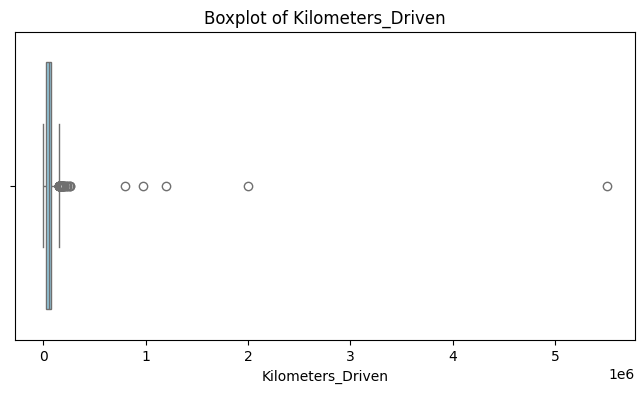

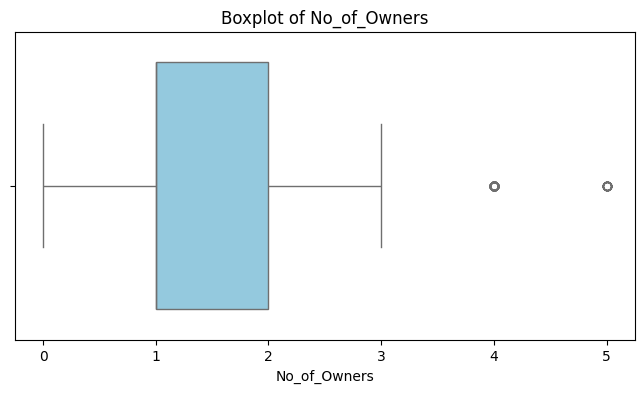

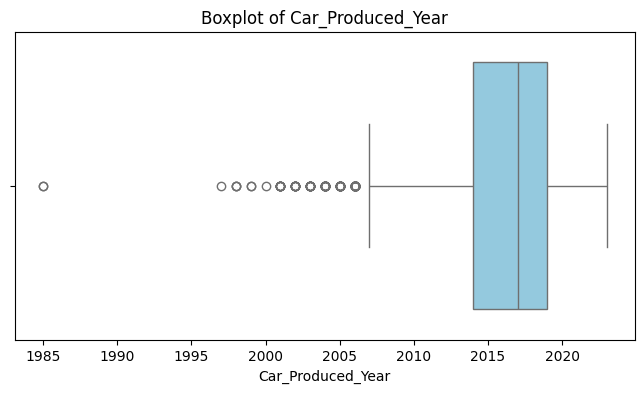

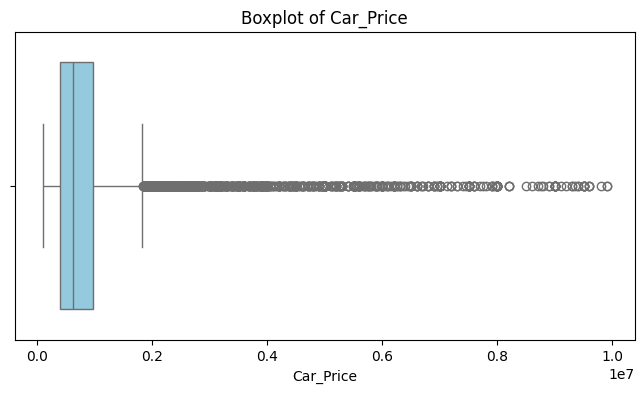

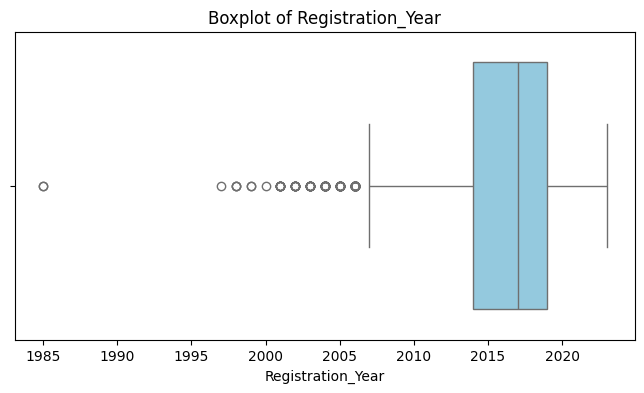

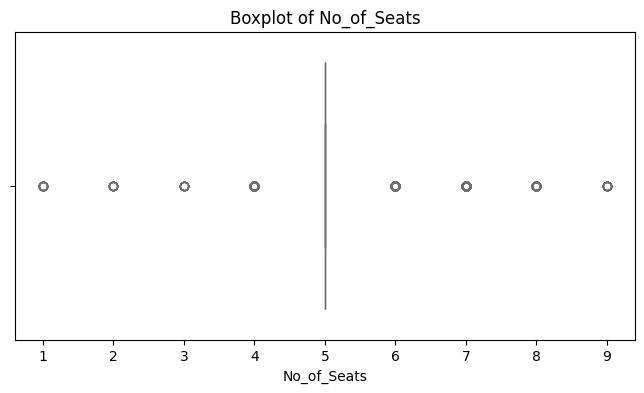

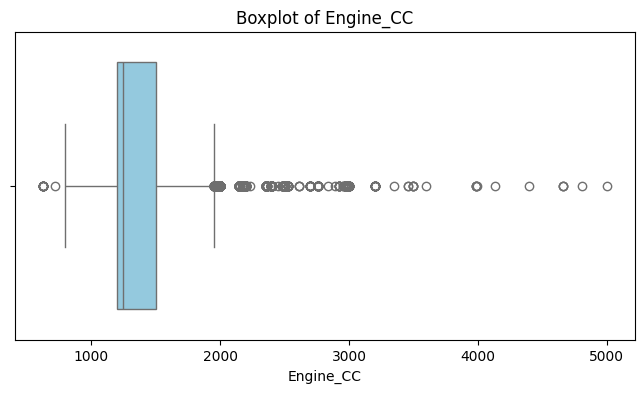

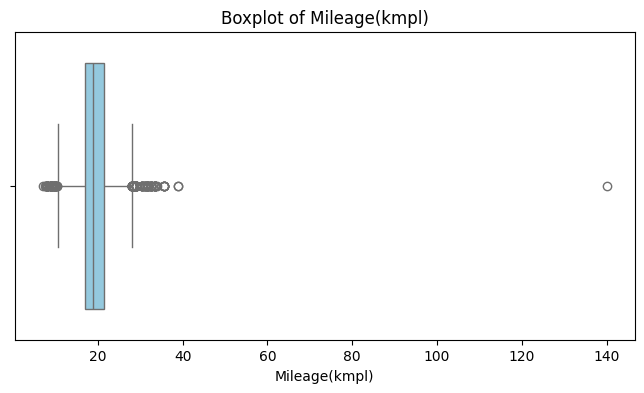

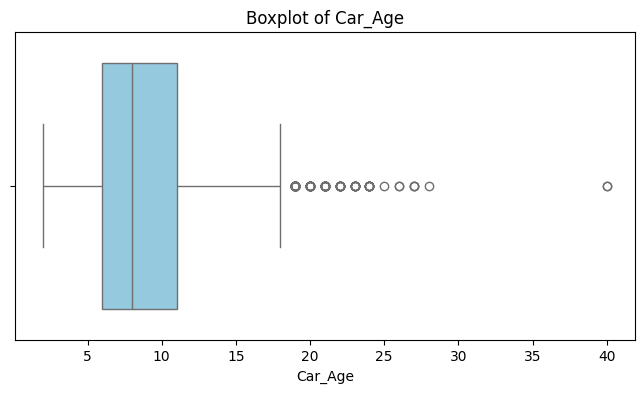

In [198]:
for col in data.select_dtypes(exclude='object'):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

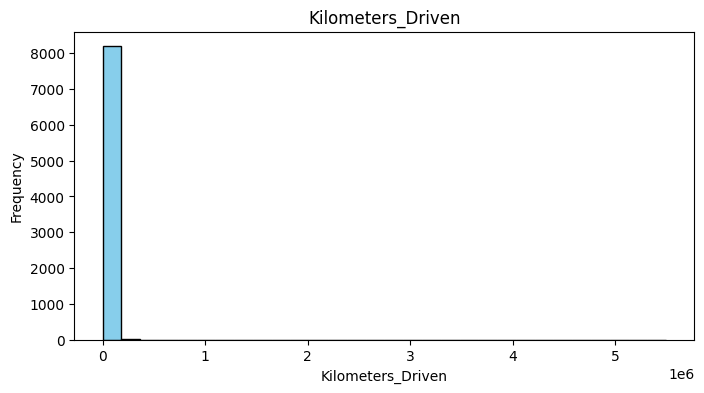

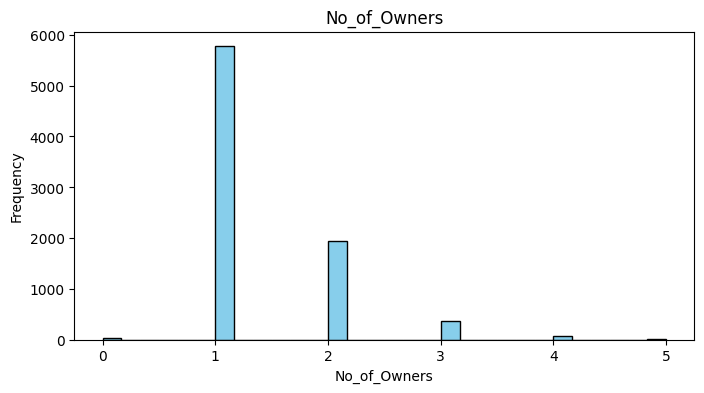

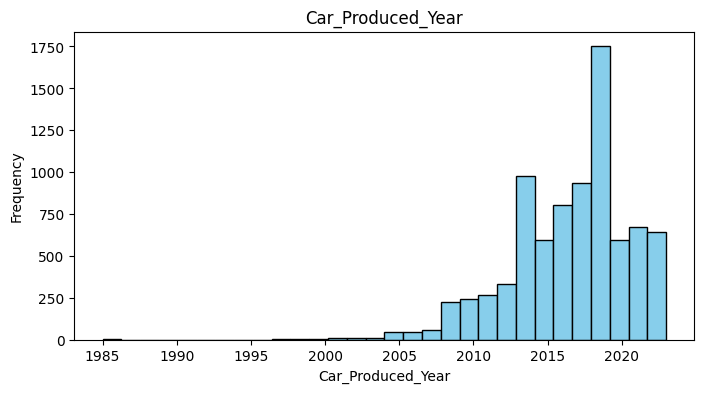

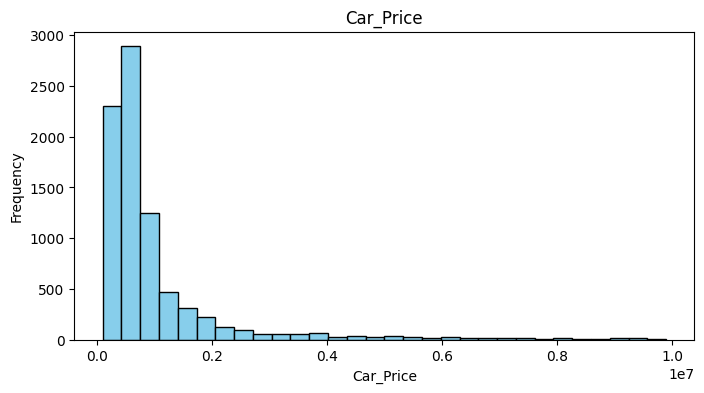

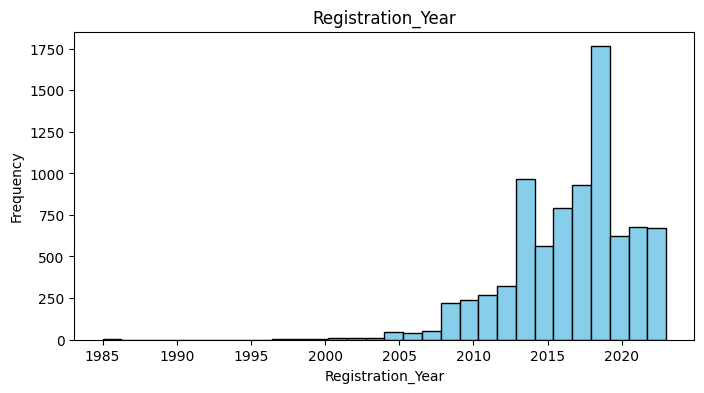

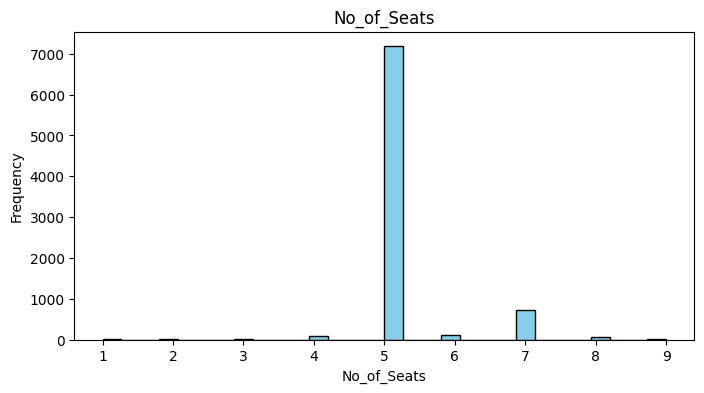

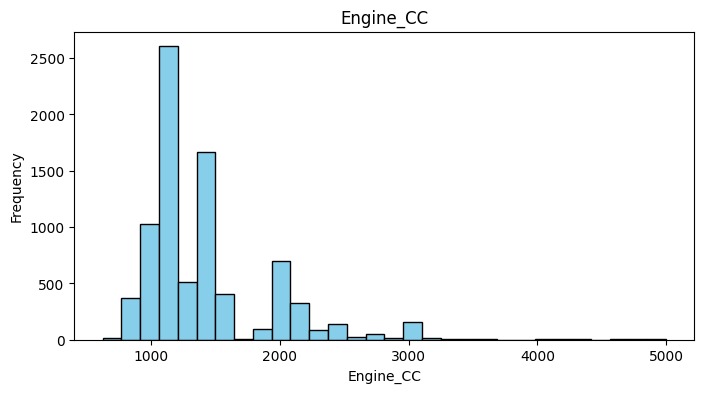

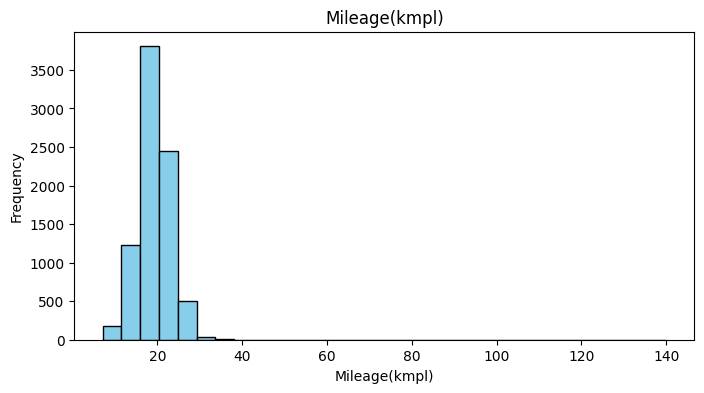

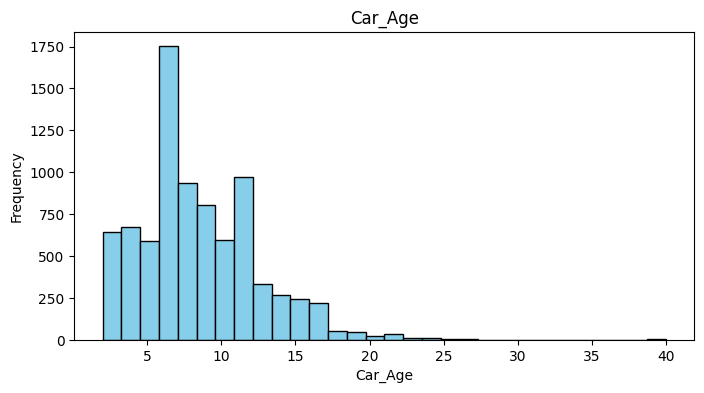

In [200]:
for col in data.select_dtypes(exclude='object'):
    plt.figure(figsize=(8,4))
    plt.hist(data[col], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"{col}")
    plt.xlabel(col)           # X-axis = column name
    plt.ylabel("Frequency")   # Y-axis always frequency
    plt.show()


In [202]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

In [203]:
data.to_csv('Cleaned_Car_Dheko.csv', index = False)

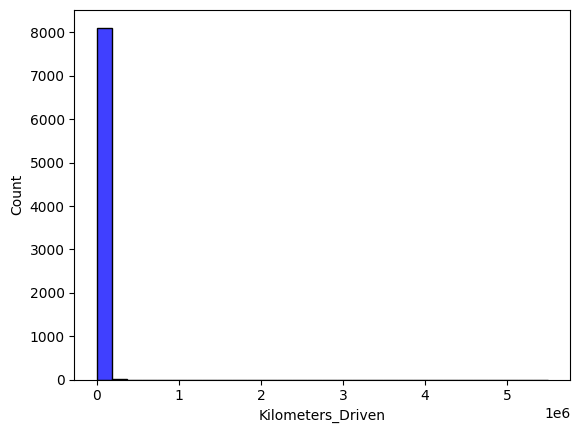

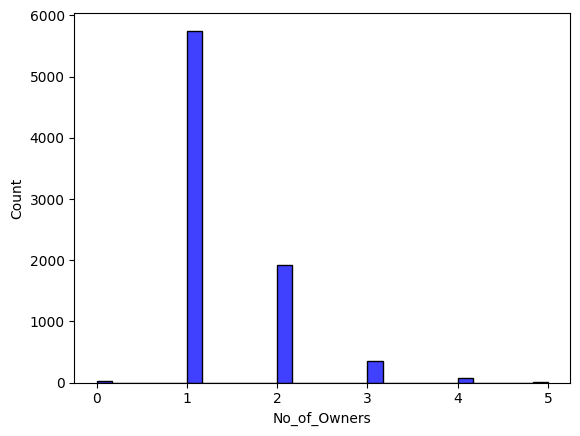

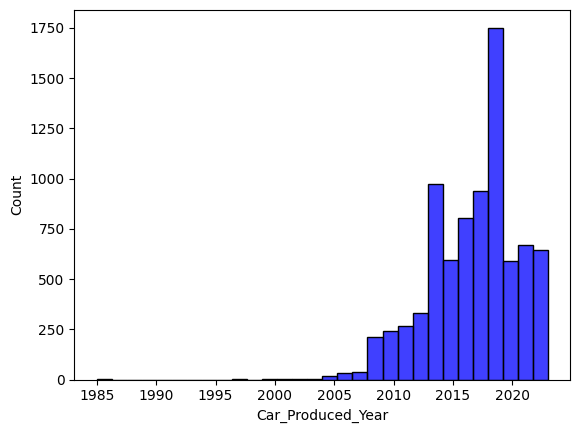

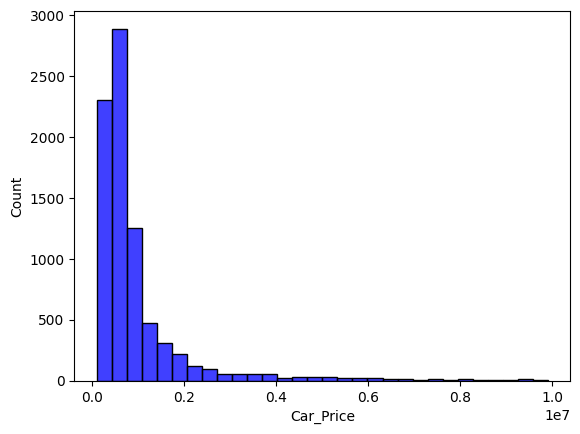

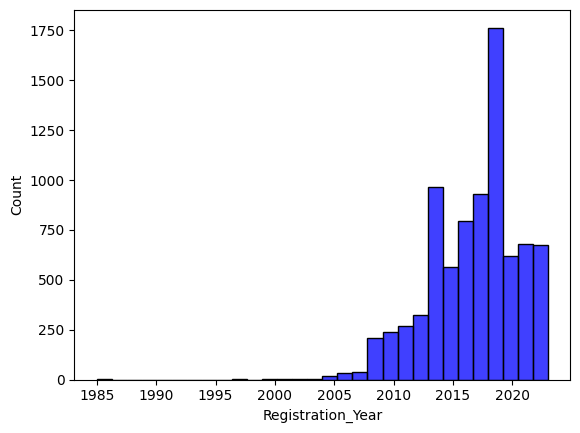

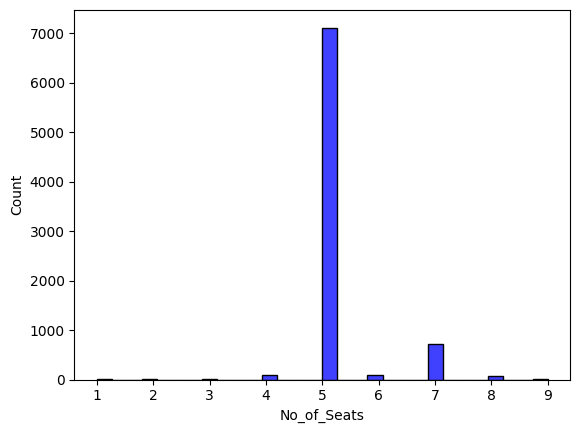

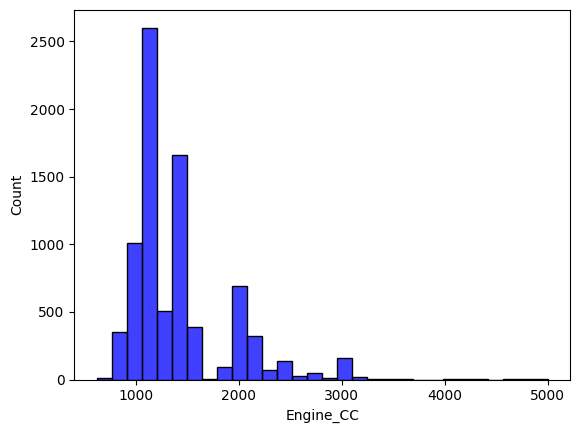

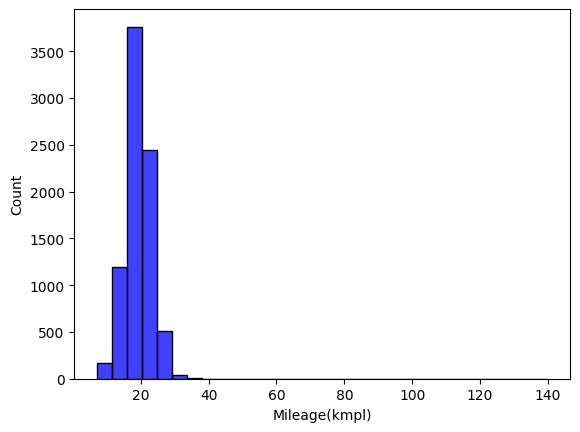

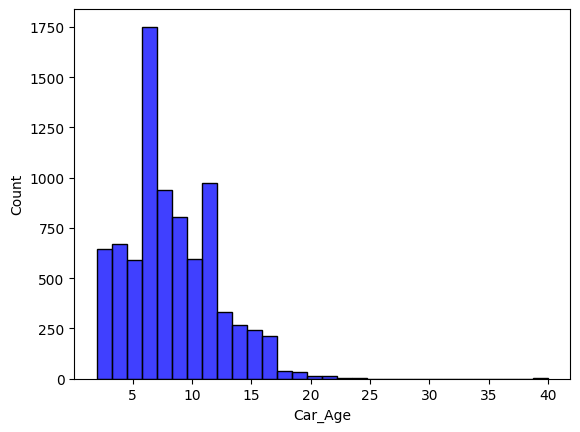

In [204]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(data[i], bins=30, kde=False, color="b")
        plt.show()

In [206]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)


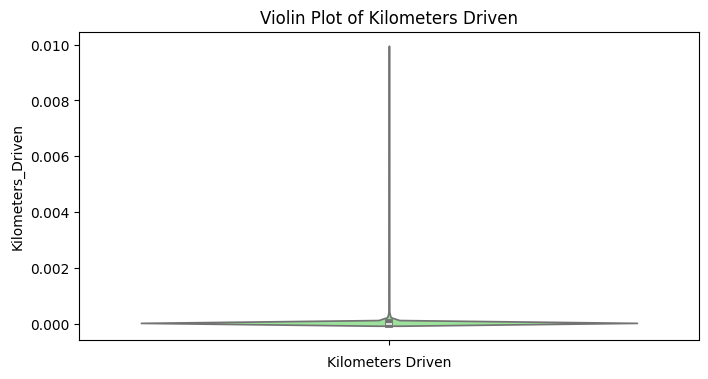

In [207]:
plt.figure(figsize=(8,4))
sns.violinplot(data=data['Kilometers_Driven'], color="lightgreen")
plt.xlabel("Kilometers Driven")
plt.title("Violin Plot of Kilometers Driven")
plt.show()


In [209]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':   # only true categoricals now
        col_name = i
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique()
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data))
        globals()[i] = dict(zip(decoded, encode))


In [210]:
Location

{'Banglore': np.float64(0.0),
 'Chennai': np.float64(1.0),
 'Delhi': np.float64(2.0),
 'Jaipur': np.float64(3.0),
 'Kolkata': np.float64(4.0)}

In [211]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [212]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [213]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

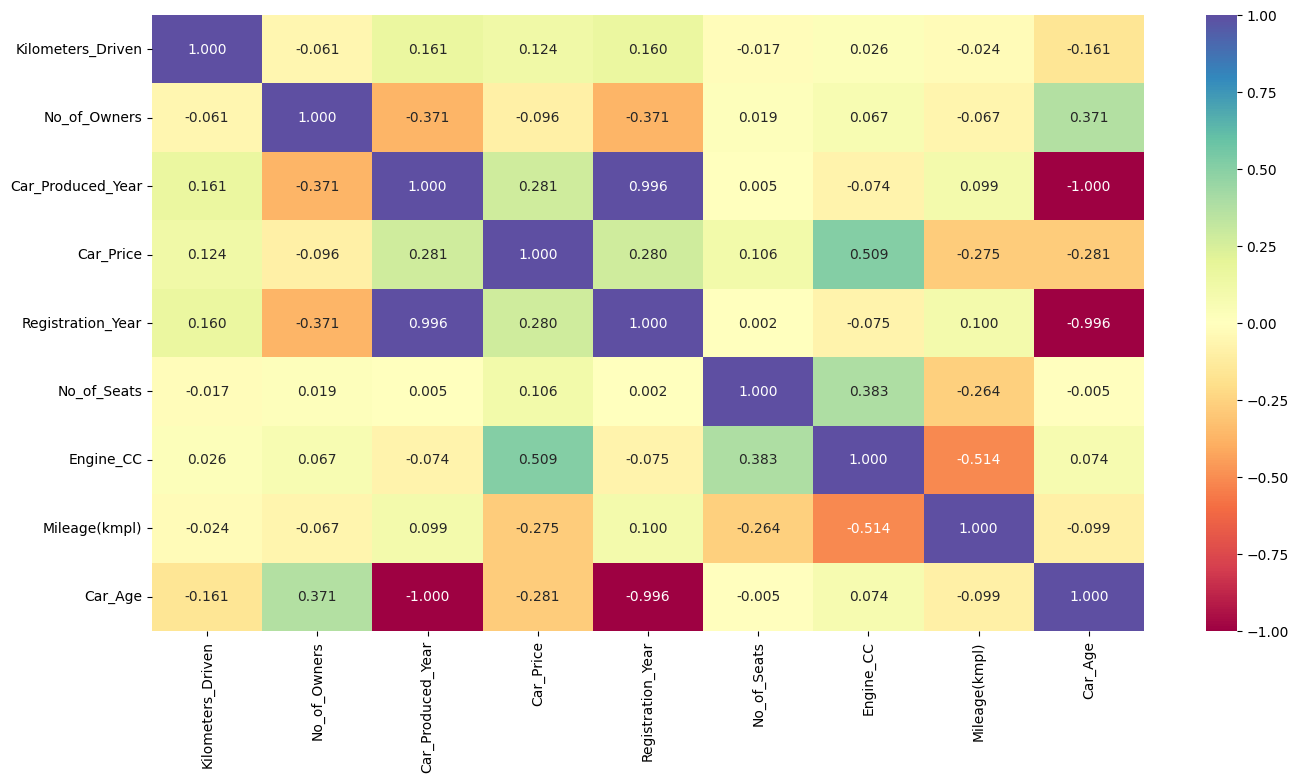

In [218]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="Spectral",fmt=".3f")

In [219]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [226]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 9.409977724580235e-24
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 1.200233864795924e-35
Transmission_Type Fuel_Type 9.409977724580101e-24
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 3.769170153263838e-29
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 1.1403000287752942e-36
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 4.873790924334023e-47
Location Fuel_Type 1.2002338647959245e-35
Location Transmission_Type 3.769170153263892e-29
Location Manufactured_By 1.1403000287752616e-36
Location Car_Model 4.873790924334023e-47
Location Location 0.0


In [234]:
# ==============================
# Car Price Prediction Pipeline
# ==============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

# ==============================
# 1. Feature Selection
# ==============================
features = df.drop('Car_Price', axis=1)
target = df['Car_Price']

# Random Forest for feature importance
rf_temp = RandomForestRegressor(n_estimators=20, random_state=40)
rf_temp.fit(features, target)

feature_importance = pd.DataFrame({
    "Feature": features.columns,
    "Score": rf_temp.feature_importances_ * 100
}).sort_values('Score', ascending=False)

print("Feature Importance:\n", feature_importance)

# Drop less important features (example based on your selection)
X = df.drop(['Car_Price','No_of_Seats', 'No_of_Owners'], axis=1)
y = df['Car_Price']

# ==============================
# 2. Train-Test Split
# ==============================
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

# ==============================
# 3. Helper function for evaluation
# ==============================
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    """Train model and return performance metrics."""
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    results = {
        "Model": name,
        "Train_MAE": mean_absolute_error(y_train, y_pred_train),
        "Test_MAE": mean_absolute_error(y_test, y_pred_test),
        "Train_R2": r2_score(y_train, y_pred_train),
        "Test_R2": r2_score(y_test, y_pred_test)
    }
    return results

# ==============================
# 4. Train Different Models
# ==============================
models = [
    ("Decision Tree", DecisionTreeRegressor(criterion='squared_error',
                                            max_depth=400, min_samples_split=10,
                                            min_samples_leaf=7, random_state=50)),

    ("KNN", KNeighborsRegressor(n_neighbors=4)),

    ("AdaBoost", AdaBoostRegressor(n_estimators=1000, learning_rate=0.001, random_state=50)),

    ("Random Forest", RandomForestRegressor(criterion='squared_error', n_estimators=700,
                                            max_depth=25, min_samples_split=7,
                                            min_samples_leaf=5, random_state=50)),

    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=400, max_depth=10,
                                                    min_samples_split=7, learning_rate=0.01,
                                                    random_state=50))
]

results = []
for name, model in models:
    results.append(evaluate_model(name, model, x_train, y_train, x_test, y_test))

# ==============================
# 5. Results Comparison
# ==============================
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df)



Feature Importance:
               Feature      Score
8           Engine_CC  43.615434
6   Car_Produced_Year  19.648091
2   Transmission_Type   9.846788
1   Kilometers_Driven   6.950722
5           Car_Model   5.499863
9       Mileage(kmpl)   5.284464
10           Location   2.707718
4     Manufactured_By   1.936315
7         No_of_Seats   1.670928
3        No_of_Owners   1.479905
0           Fuel_Type   1.359771
Train shape: (6506, 9), Test shape: (1627, 9)

Model Performance Comparison:

               Model      Train_MAE       Test_MAE  Train_R2   Test_R2
0      Decision Tree  164645.368873  228784.863637  0.819144  0.586650
1                KNN  143235.129112  192201.751690  0.840734  0.674191
2           AdaBoost  389150.532324  398025.003018  0.564183  0.498205
3      Random Forest  152888.805854  202479.682725  0.833108  0.664715
4  Gradient Boosting   74482.006917  183834.539333  0.972861  0.677488


### **How to decide the “best” model:**

Lower Test_MAE → better predictive accuracy (smaller errors).

Higher Test_R² → better fit on unseen data.

Close Train vs Test performance → less overfitting.

### **Analysis:**
```
Gradient Boosting
Best Test_R² = 0.682 (highest among all).

Lowest Test_MAE = 182,810.

Training R² is very high (0.975) → some risk of overfitting, but generalizes well.

KNN

Second-best Test_R² = 0.671.

Test_MAE = 192,628 (slightly higher than GB).

Train/Test gap is small → more stable than GB.

Random Forest is close to KNN, but slightly weaker in both MAE and R².
```

In [237]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 9.409977724580235e-24
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 1.200233864795924e-35
Transmission_Type Fuel_Type 9.409977724580101e-24
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 3.769170153263838e-29
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 1.1403000287752942e-36
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 4.873790924334023e-47
Location Fuel_Type 1.2002338647959245e-35
Location Transmission_Type 3.769170153263892e-29
Location Manufactured_By 1.1403000287752616e-36
Location Car_Model 4.873790924334023e-47
Location Location 0.0


In [238]:
from sklearn.ensemble import RandomForestRegressor

In [239]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [240]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [241]:
model.feature_importances_

array([0.01359771, 0.06950722, 0.09846788, 0.01479905, 0.01936315,
       0.05499863, 0.19648091, 0.01670928, 0.43615434, 0.05284464,
       0.02707718])

In [242]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,43.615434
6,Car_Produced_Year,19.648091
2,Transmission_Type,9.846788
1,Kilometers_Driven,6.950722
5,Car_Model,5.499863
9,Mileage(kmpl),5.284464
10,Location,2.707718
4,Manufactured_By,1.936315
7,No_of_Seats,1.670928
3,No_of_Owners,1.479905


In [243]:
x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8133, 7)


,Kilometers_Driven,Transmission_Type,Car_Model,Car_Produced_Year,Engine_CC,Mileage(kmpl),Location
0,0.000008,1.0,154.0,2015,998,23.10,0.0
1,0.000031,1.0,49.0,2018,1497,17.00,0.0
2,0.000084,1.0,259.0,2018,1199,23.84,0.0
3,0.000056,1.0,85.0,2014,1197,19.10,0.0
4,0.000017,1.0,172.0,2015,1248,23.65,0.0
...,...,...,...,...,...,...,...
8128,0.000100,1.0,154.0,2022,998,25.24,4.0
8129,0.000008,1.0,149.0,2014,796,22.74,4.0
8130,0.000020,0.0,190.0,2011,1796,11.74,4.0
8131,0.000025,1.0,169.0,2012,1197,18.50,4.0


In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [245]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6506, 7), (1627, 7), (6506,), (1627,))

In [246]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [247]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

164193.24996740458
229135.74179354758
0.8196899123303761
0.5876361848308347


In [248]:
from sklearn.neighbors import KNeighborsRegressor

In [249]:
model_kn = KNeighborsRegressor(n_neighbors = 4)
model_kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [250]:
y_pred_test = model_kn.predict(x_test)
y_pred_train = model_kn.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

144736.81985859206
192627.9963122311
0.8357656024491127
0.6712592896535433


In [251]:
from sklearn.ensemble import AdaBoostRegressor

In [252]:
model_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.001)
model_ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=1000)

In [253]:
y_pred_test = model_ada.predict(x_test)
y_pred_train = model_ada.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

383623.7366808385
392619.3240136783
0.5718409077604778
0.5031279302315204


In [254]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [255]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

152985.95860313828
202953.5441684738
0.8330316339139572
0.6643606190821365


In [256]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [257]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

73701.23951774971
182783.36160936492
0.9743865491065907
0.6808996494812871


In [258]:
import pickle

with open('GradientBoost_model_new1.pkl', 'wb') as file:
    pickle.dump(model_GB,file)